# Alura Cash

Construção de um modelo Machile Learning para identificar quais clientes são possíveis inadimplentes.

In [145]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Importando o conjunto de dados

In [146]:
url = 'https://raw.githubusercontent.com/EvelyneBomfim/Challenge_Data_Science/main/Dados/analise_risco.csv'
dados = pd.read_csv(url)

In [147]:
dados.head()

,ID_SOLICITANTE,ID_EMPRESTIMO,ID_HISTORICO,ID_SOLICITANTE.1,IDADE_SOLICITANTE,SALARIO_ANUAL,SITUACAO_PROPRIEDADE,ANOS_TRABALHADOS,ID_EMPRESTIMO.1,MOTIVO,PONTUACAO,VALOR_TOTAL_EMPRESTIMO,TAXA_JUROS,POSSIBILIDADE_INADIMPLENCIA,RENDA_PERCENTUAL,ID_HISTORICO.1,HISTORICO_INADIMPLENTE,ANOS_CARTAO_CREDITO
0,JAz2tRvQ-14cy,pjEu6snv-4t33,FIgNSkrG-wen7,JAz2tRvQ-14cy,NaN,41160.0,Alugada,2.0,pjEu6snv-4t33,Pagamento de débitos,A,6500.0,13.57,0.0,NaN,FIgNSkrG-wen7,1.0,2
1,MZSefq9m-loYS,Mfn0Csx4-LGM3,QPDJUQfQ-DJqK,MZSefq9m-loYS,22.0,29000.0,Hipotecada,5.0,Mfn0Csx4-LGM3,Pagamento de débitos,B,9000.0,NaN,1.0,0.31,QPDJUQfQ-DJqK,0.0,4
2,cRItaaPB-pRvT,Ks4nz74P-z6Iq,hzAXqSDh-ay7Q,cRItaaPB-pRvT,31.0,19968.0,Alugada,1.0,Ks4nz74P-z6Iq,Educativo,B,2500.0,9.62,1.0,0.13,hzAXqSDh-ay7Q,0.0,6
3,5jTDCfXS-zaAq,ZFlwW08i-I3Al,LiAivrS4-J5DE,5jTDCfXS-zaAq,29.0,73000.0,Alugada,1.0,ZFlwW08i-I3Al,Melhora do lar,B,5000.0,12.42,0.0,NaN,LiAivrS4-J5DE,NaN,11
4,Hbz9PtI3-tOFs,bFMFchcv-UwQW,PkBixMJ3-3bad,Hbz9PtI3-tOFs,29.0,42000.0,Alugada,4.0,bFMFchcv-UwQW,Empreendimento,G,1600.0,19.16,0.0,0.04,PkBixMJ3-3bad,1.0,6


In [148]:
print('O conjunto de dados possui {0} linhas e {1} colunas'.format(dados.shape[0], dados.shape[1]))

O conjunto de dados possui 14952 linhas e 18 colunas


In [149]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14952 entries, 0 to 14951
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID_SOLICITANTE               14952 non-null  object 
 1   ID_EMPRESTIMO                14952 non-null  object 
 2   ID_HISTORICO                 14952 non-null  object 
 3   ID_SOLICITANTE.1             14952 non-null  object 
 4   IDADE_SOLICITANTE            14819 non-null  float64
 5   SALARIO_ANUAL                14809 non-null  float64
 6   SITUACAO_PROPRIEDADE         14800 non-null  object 
 7   ANOS_TRABALHADOS             14389 non-null  float64
 8   ID_EMPRESTIMO.1              14952 non-null  object 
 9   MOTIVO                       14844 non-null  object 
 10  PONTUACAO                    14828 non-null  object 
 11  VALOR_TOTAL_EMPRESTIMO       14813 non-null  float64
 12  TAXA_JUROS                   13384 non-null  float64
 13  POSSIBILIDADE_IN

## Tratando as colunas

### Renomeando as colunas
O nome das colunas está todo em maiusculo, irei alterar para ficar em minusculo

In [150]:
dados.columns = dados.columns.str.lower()
dados.head()

,id_solicitante,id_emprestimo,id_historico,id_solicitante.1,idade_solicitante,salario_anual,situacao_propriedade,anos_trabalhados,id_emprestimo.1,motivo,pontuacao,valor_total_emprestimo,taxa_juros,possibilidade_inadimplencia,renda_percentual,id_historico.1,historico_inadimplente,anos_cartao_credito
0,JAz2tRvQ-14cy,pjEu6snv-4t33,FIgNSkrG-wen7,JAz2tRvQ-14cy,NaN,41160.0,Alugada,2.0,pjEu6snv-4t33,Pagamento de débitos,A,6500.0,13.57,0.0,NaN,FIgNSkrG-wen7,1.0,2
1,MZSefq9m-loYS,Mfn0Csx4-LGM3,QPDJUQfQ-DJqK,MZSefq9m-loYS,22.0,29000.0,Hipotecada,5.0,Mfn0Csx4-LGM3,Pagamento de débitos,B,9000.0,NaN,1.0,0.31,QPDJUQfQ-DJqK,0.0,4
2,cRItaaPB-pRvT,Ks4nz74P-z6Iq,hzAXqSDh-ay7Q,cRItaaPB-pRvT,31.0,19968.0,Alugada,1.0,Ks4nz74P-z6Iq,Educativo,B,2500.0,9.62,1.0,0.13,hzAXqSDh-ay7Q,0.0,6
3,5jTDCfXS-zaAq,ZFlwW08i-I3Al,LiAivrS4-J5DE,5jTDCfXS-zaAq,29.0,73000.0,Alugada,1.0,ZFlwW08i-I3Al,Melhora do lar,B,5000.0,12.42,0.0,NaN,LiAivrS4-J5DE,NaN,11
4,Hbz9PtI3-tOFs,bFMFchcv-UwQW,PkBixMJ3-3bad,Hbz9PtI3-tOFs,29.0,42000.0,Alugada,4.0,bFMFchcv-UwQW,Empreendimento,G,1600.0,19.16,0.0,0.04,PkBixMJ3-3bad,1.0,6


### Excluindo colunas
Irei excluir as colunas ID e as repetidas (id_solicitante.1, id_emprestimo.1, id_historico.1)

In [151]:
dados.drop(columns=['id_solicitante', 'id_emprestimo', 'id_historico','id_solicitante.1', 'id_emprestimo.1', 'id_historico.1'], inplace=True)
dados.head()

,idade_solicitante,salario_anual,situacao_propriedade,anos_trabalhados,motivo,pontuacao,valor_total_emprestimo,taxa_juros,possibilidade_inadimplencia,renda_percentual,historico_inadimplente,anos_cartao_credito
0,NaN,41160.0,Alugada,2.0,Pagamento de débitos,A,6500.0,13.57,0.0,NaN,1.0,2
1,22.0,29000.0,Hipotecada,5.0,Pagamento de débitos,B,9000.0,NaN,1.0,0.31,0.0,4
2,31.0,19968.0,Alugada,1.0,Educativo,B,2500.0,9.62,1.0,0.13,0.0,6
3,29.0,73000.0,Alugada,1.0,Melhora do lar,B,5000.0,12.42,0.0,NaN,NaN,11
4,29.0,42000.0,Alugada,4.0,Empreendimento,G,1600.0,19.16,0.0,0.04,1.0,6


## Excluindo dados nulos
Irei excluir as linhas que possuem campos nulos.

In [152]:
dados.isnull().sum()

idade_solicitante               133
salario_anual                   143
situacao_propriedade            152
anos_trabalhados                563
motivo                          108
pontuacao                       124
valor_total_emprestimo          139
taxa_juros                     1568
possibilidade_inadimplencia     157
renda_percentual                140
historico_inadimplente          161
anos_cartao_credito               0
dtype: int64

In [153]:
dados.dropna(axis=0, how='any', inplace=True)
#dados.head()

In [154]:
# Resetando o index
dados.reset_index(drop=True, inplace=True)
dados.head()

,idade_solicitante,salario_anual,situacao_propriedade,anos_trabalhados,motivo,pontuacao,valor_total_emprestimo,taxa_juros,possibilidade_inadimplencia,renda_percentual,historico_inadimplente,anos_cartao_credito
0,31.0,19968.0,Alugada,1.0,Educativo,B,2500.0,9.62,1.0,0.13,0.0,6
1,29.0,42000.0,Alugada,4.0,Empreendimento,G,1600.0,19.16,0.0,0.04,1.0,6
2,21.0,45000.0,Alugada,3.0,Pessoal,A,7200.0,9.38,0.0,0.16,0.0,4
3,22.0,72000.0,Própria,1.0,Empreendimento,B,15000.0,10.25,0.0,0.21,0.0,4
4,24.0,81600.0,Alugada,5.0,Empreendimento,C,8000.0,12.84,0.0,0.10,1.0,2


## Tratando outliers

In [155]:
dados.describe().round(2)

,idade_solicitante,salario_anual,anos_trabalhados,valor_total_emprestimo,taxa_juros,possibilidade_inadimplencia,renda_percentual,historico_inadimplente,anos_cartao_credito
count,12420.00,12420.00,12420.00,12420.00,12420.00,12420.00,12420.00,12420.00,12420.00
mean,27.71,65657.23,4.82,9602.05,11.03,0.22,0.17,0.18,5.80
std,6.26,47449.51,4.10,6311.77,3.23,0.41,0.11,0.38,4.06
min,20.00,4000.00,0.00,700.00,5.42,0.00,0.01,0.00,2.00
25%,23.00,39000.00,2.00,5000.00,7.90,0.00,0.09,0.00,3.00
50%,26.00,55600.00,4.00,8000.00,10.99,0.00,0.15,0.00,4.00
75%,30.00,79386.00,7.00,12250.00,13.48,0.00,0.23,0.00,8.00
max,144.00,1200000.00,34.00,35000.00,23.22,1.00,0.76,1.00,30.00


Apenas olhando os dados, já percebe-se um erro na idade_solicitante.

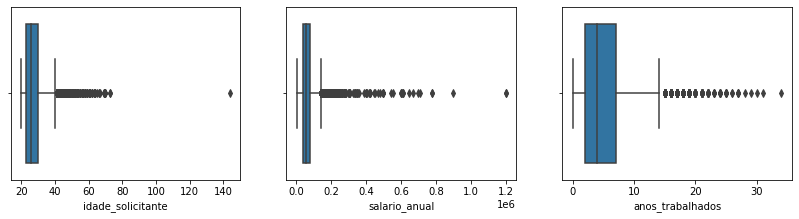

In [156]:
plt.subplots(figsize=(14,7))

plt.subplot(2,3,1)
sns.boxplot(data=dados, x='idade_solicitante')

plt.subplot(2,3,2)
sns.boxplot(data=dados, x='salario_anual')

plt.subplot(2,3,3)
sns.boxplot(data=dados, x='anos_trabalhados')

Existe um campo em que a idade do solicitante é 144 anos.
Irei excluir esta linha.

In [157]:
idade_out = dados.query('idade_solicitante > 100').index.values
dados.drop(idade_out, inplace=True)

## Correlação

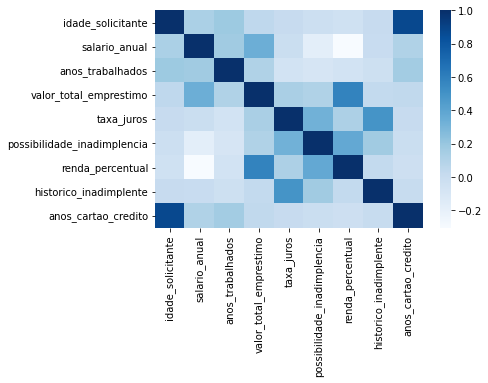

In [158]:
corr = dados.corr()
sns.heatmap(corr, cmap='Blues')

No mapa de calor, vemos que há correlação entre as variáveis:
- idade_solicitante x anos_cartao_credito
- renda_percentual x valor_total_emprestimo

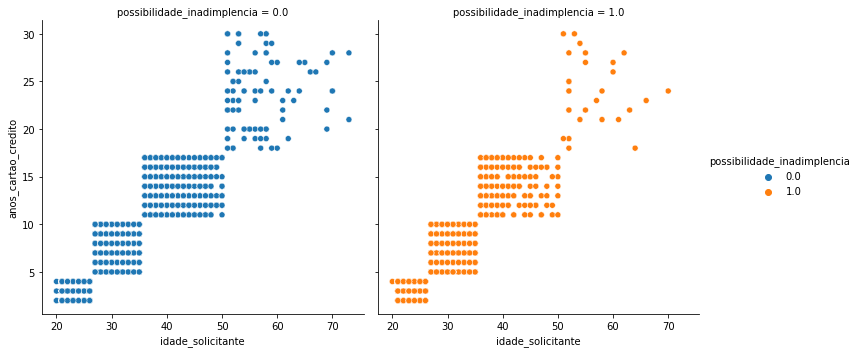

In [159]:
sns.relplot(x="idade_solicitante", y="anos_cartao_credito", hue="possibilidade_inadimplencia", col="possibilidade_inadimplencia", data=dados)

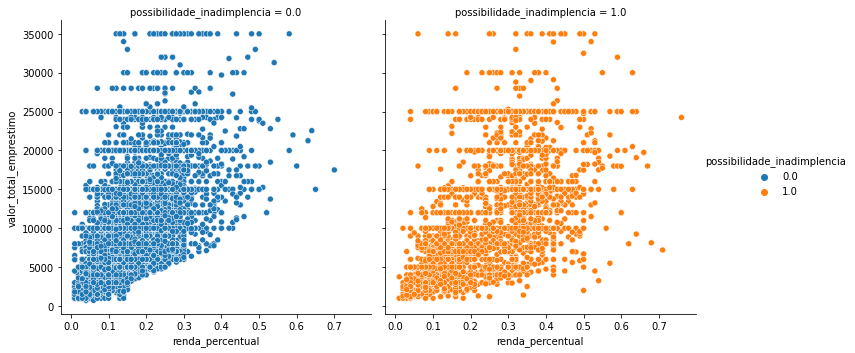

In [160]:
sns.relplot(x="renda_percentual", y="valor_total_emprestimo", hue="possibilidade_inadimplencia", col="possibilidade_inadimplencia", data=dados)

## Encoding
Tratando variáveis categóricas. 
Convertendo uma variável "string" em inteiro.

In [161]:
dados.head()

,idade_solicitante,salario_anual,situacao_propriedade,anos_trabalhados,motivo,pontuacao,valor_total_emprestimo,taxa_juros,possibilidade_inadimplencia,renda_percentual,historico_inadimplente,anos_cartao_credito
0,31.0,19968.0,Alugada,1.0,Educativo,B,2500.0,9.62,1.0,0.13,0.0,6
1,29.0,42000.0,Alugada,4.0,Empreendimento,G,1600.0,19.16,0.0,0.04,1.0,6
2,21.0,45000.0,Alugada,3.0,Pessoal,A,7200.0,9.38,0.0,0.16,0.0,4
3,22.0,72000.0,Própria,1.0,Empreendimento,B,15000.0,10.25,0.0,0.21,0.0,4
4,24.0,81600.0,Alugada,5.0,Empreendimento,C,8000.0,12.84,0.0,0.10,1.0,2


In [162]:
x = dados.drop(['possibilidade_inadimplencia'], axis=1)
y = dados['possibilidade_inadimplencia']

In [163]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

In [164]:
colunas_categoricas = ['situacao_propriedade','motivo','pontuacao']

one_hot_enc = make_column_transformer(
    (OneHotEncoder(), colunas_categoricas),
    remainder='passthrough')

dados_enc = one_hot_enc.fit_transform(x)
dados_enc = pd.DataFrame(dados_enc, columns=one_hot_enc.get_feature_names_out())

## Normalizando os dados

In [165]:
dados_enc.head()

,onehotencoder__situacao_propriedade_Alugada,onehotencoder__situacao_propriedade_Hipotecada,onehotencoder__situacao_propriedade_Outros,onehotencoder__situacao_propriedade_Própria,onehotencoder__motivo_Educativo,onehotencoder__motivo_Empreendimento,onehotencoder__motivo_Melhora do lar,onehotencoder__motivo_Médico,onehotencoder__motivo_Pagamento de débitos,onehotencoder__motivo_Pessoal,...,onehotencoder__pontuacao_F,onehotencoder__pontuacao_G,remainder__idade_solicitante,remainder__salario_anual,remainder__anos_trabalhados,remainder__valor_total_emprestimo,remainder__taxa_juros,remainder__renda_percentual,remainder__historico_inadimplente,remainder__anos_cartao_credito
0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,31.0,19968.0,1.0,2500.0,9.62,0.13,0.0,6.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,29.0,42000.0,4.0,1600.0,19.16,0.04,1.0,6.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,21.0,45000.0,3.0,7200.0,9.38,0.16,0.0,4.0
3,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,22.0,72000.0,1.0,15000.0,10.25,0.21,0.0,4.0
4,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,24.0,81600.0,5.0,8000.0,12.84,0.10,1.0,2.0


In [166]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(dados_enc)
scaled_features = scaler.transform(dados_enc)


x = pd.DataFrame (scaled_features, columns = one_hot_enc.get_feature_names_out())

In [167]:
x.head()

,onehotencoder__situacao_propriedade_Alugada,onehotencoder__situacao_propriedade_Hipotecada,onehotencoder__situacao_propriedade_Outros,onehotencoder__situacao_propriedade_Própria,onehotencoder__motivo_Educativo,onehotencoder__motivo_Empreendimento,onehotencoder__motivo_Melhora do lar,onehotencoder__motivo_Médico,onehotencoder__motivo_Pagamento de débitos,onehotencoder__motivo_Pessoal,...,onehotencoder__pontuacao_F,onehotencoder__pontuacao_G,remainder__idade_solicitante,remainder__salario_anual,remainder__anos_trabalhados,remainder__valor_total_emprestimo,remainder__taxa_juros,remainder__renda_percentual,remainder__historico_inadimplente,remainder__anos_cartao_credito
0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.207547,0.013351,0.029412,0.052478,0.235955,0.160000,0.0,0.142857
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.169811,0.031773,0.117647,0.026239,0.771910,0.040000,1.0,0.142857
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.018868,0.034281,0.088235,0.189504,0.222472,0.200000,0.0,0.071429
3,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.037736,0.056856,0.029412,0.416910,0.271348,0.266667,0.0,0.071429
4,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.075472,0.064883,0.147059,0.212828,0.416854,0.120000,1.0,0.000000


## Modelos utilizando oversampling

### Oversampling - SMOTE

Será feito o oversampling com Smote, para igualar a quantidade de clientes possíveis inadimplentes *(y=1)* e não inadimplentes *(y=0)*.

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Quantidade')

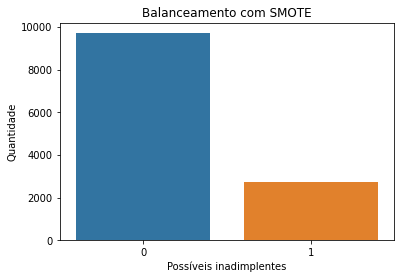

In [168]:
yi = y.astype(int)

#Gráfico
sns.countplot(yi)
plt.title('Balanceamento com SMOTE')
plt.xlabel('Possíveis inadimplentes')
plt.ylabel('Quantidade')

In [169]:
from imblearn.over_sampling import SMOTE

In [170]:
SEED = 144

In [171]:
sm = SMOTE(random_state=SEED)
x_sm, y_sm = sm.fit_resample(x, y)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Quantidade')

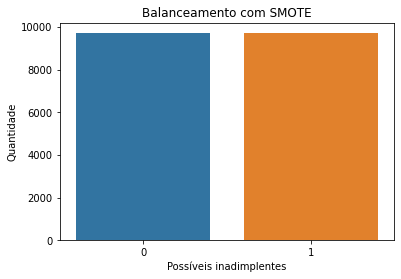

In [172]:
yi = y_sm.astype(int)

#Gráfico
sns.countplot(yi)
plt.title('Balanceamento com SMOTE')
plt.xlabel('Possíveis inadimplentes')
plt.ylabel('Quantidade')

### Separando os dados para treinamento

In [173]:
from sklearn.model_selection import train_test_split

In [174]:
x_treino_sm, x_teste_sm, y_treino_sm, y_teste_sm = train_test_split(x_sm, y_sm, test_size = 0.25, random_state = SEED, stratify = y_sm)
print('Smote - Treinaremos com {} elementos e testaremos com {} elementos.'.format(len(x_treino_sm), len(x_teste_sm)))

Smote - Treinaremos com 14562 elementos e testaremos com 4854 elementos.


### DecisionTreeClassifier

In [175]:
from sklearn.tree import DecisionTreeClassifier

In [176]:
arvore_sm = DecisionTreeClassifier(random_state=SEED)
arvore_sm.fit(x_treino_sm, y_treino_sm)
previsao_arvore_sm = arvore_sm.predict(x_teste_sm)

In [177]:
from sklearn.metrics import classification_report
print(classification_report(y_teste_sm, previsao_arvore_sm))

              precision    recall  f1-score   support

         0.0       0.90      0.87      0.88      2427
         1.0       0.87      0.90      0.89      2427

    accuracy                           0.88      4854
   macro avg       0.88      0.88      0.88      4854
weighted avg       0.88      0.88      0.88      4854



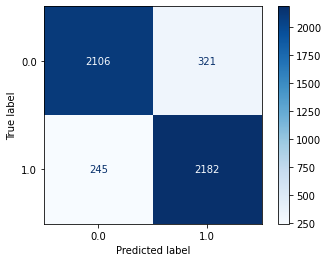

In [178]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(arvore_sm, x_teste_sm, y_teste_sm, cmap = 'Blues')
plt.grid(False)
plt.show()

### GradientBoostingClassifier

In [179]:
from sklearn.ensemble import GradientBoostingClassifier

In [180]:
gboost_sm = GradientBoostingClassifier(random_state=SEED)
gboost_sm.fit(x_treino_sm, y_treino_sm)
previsao_gboost_sm = gboost_sm.predict(x_teste_sm)

In [181]:
print(classification_report(y_teste_sm, previsao_gboost_sm))

              precision    recall  f1-score   support

         0.0       0.87      0.94      0.90      2427
         1.0       0.93      0.86      0.89      2427

    accuracy                           0.90      4854
   macro avg       0.90      0.90      0.90      4854
weighted avg       0.90      0.90      0.90      4854



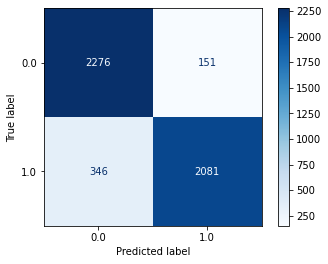

In [182]:
ConfusionMatrixDisplay.from_estimator(gboost_sm, x_teste_sm, y_teste_sm, cmap = 'Blues')
plt.grid(False)
plt.show()

### LogisticRegression

In [183]:
from sklearn.linear_model import LogisticRegression

In [184]:
regressao_sm = LogisticRegression(random_state=SEED)
regressao_sm.fit(x_treino_sm, y_treino_sm)
previsao_regressao_sm = regressao_sm.predict(x_teste_sm)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [185]:
print(classification_report(y_teste_sm, previsao_regressao_sm))

              precision    recall  f1-score   support

         0.0       0.79      0.82      0.81      2427
         1.0       0.81      0.79      0.80      2427

    accuracy                           0.80      4854
   macro avg       0.80      0.80      0.80      4854
weighted avg       0.80      0.80      0.80      4854



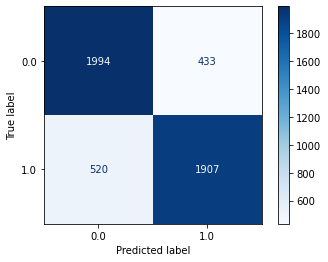

In [186]:
ConfusionMatrixDisplay.from_estimator(regressao_sm, x_teste_sm, y_teste_sm, cmap = 'Blues')
plt.grid(False)
plt.show()

## Modelos utilizando undersampling

Será feito o undersampling com NerMiss, para igualar a quantidade de clientes possíveis inadimplentes *(y=1)* e não inadimplentes *(y=0)*.

### Undersampling - NearMiss

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Quantidade')

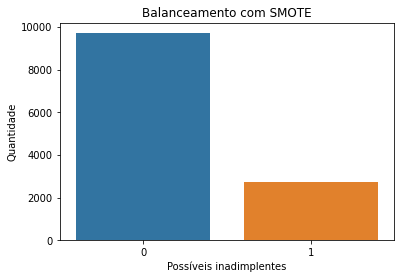

In [187]:
yi = y.astype(int)

#Gráfico
sns.countplot(yi)
plt.title('Balanceamento com SMOTE')
plt.xlabel('Possíveis inadimplentes')
plt.ylabel('Quantidade')

In [188]:
from imblearn.under_sampling import NearMiss

In [189]:
SEED = 144

In [190]:
nm = NearMiss()
x_nm, y_nm = nm.fit_resample(x, y)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Quantidade')

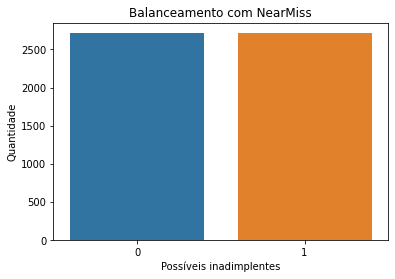

In [191]:
yi = y_nm.astype(int)

#Gráfico
sns.countplot(yi)
plt.title('Balanceamento com NearMiss')
plt.xlabel('Possíveis inadimplentes')
plt.ylabel('Quantidade')

### Separando os dados para treinamento

In [192]:
x_treino_nm, x_teste_nm, y_treino_nm, y_teste_nm =  train_test_split(x_nm, y_nm, random_state=SEED, test_size = 0.25, stratify = y_nm)  
print('NearMiss - Treinaremos com {} elementos e testaremos com {} elementos.'.format(len(x_treino_nm), len(x_teste_nm)))

NearMiss - Treinaremos com 4066 elementos e testaremos com 1356 elementos.


### DecisionTreeClassifier

In [193]:
arvore_nm = DecisionTreeClassifier()
arvore_nm.fit(x_treino_nm, y_treino_nm) 
previsao_arvore_nm = arvore_nm.predict(x_teste_nm)

In [194]:
print(classification_report(y_teste_nm, previsao_arvore_nm))

              precision    recall  f1-score   support

         0.0       0.83      0.83      0.83       678
         1.0       0.83      0.83      0.83       678

    accuracy                           0.83      1356
   macro avg       0.83      0.83      0.83      1356
weighted avg       0.83      0.83      0.83      1356



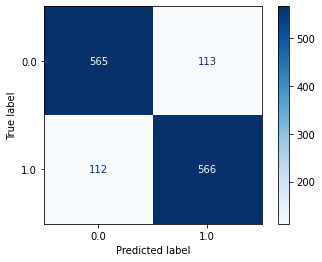

In [195]:
ConfusionMatrixDisplay.from_estimator(arvore_nm, x_teste_nm, y_teste_nm, cmap='Blues')
plt.grid(False)
plt.show()

### GradientBoostingClassifier

In [196]:
gboost_nm = GradientBoostingClassifier(random_state=SEED)
gboost_nm.fit(x_treino_nm, y_treino_nm)
previsao_gboost_nm = gboost_nm.predict(x_teste_nm)

In [197]:
print(classification_report(y_teste_nm, previsao_gboost_nm))

              precision    recall  f1-score   support

         0.0       0.87      0.94      0.90       678
         1.0       0.93      0.86      0.90       678

    accuracy                           0.90      1356
   macro avg       0.90      0.90      0.90      1356
weighted avg       0.90      0.90      0.90      1356



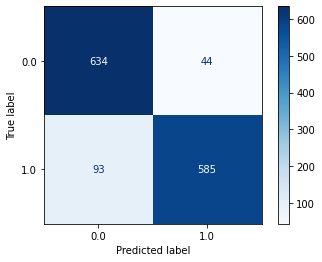

In [198]:
ConfusionMatrixDisplay.from_estimator(gboost_nm, x_teste_nm, y_teste_nm, cmap = 'Blues')
plt.grid(False)
plt.show()

### LogisticRegression

In [199]:
regressao_nm = LogisticRegression(random_state=SEED)
regressao_nm.fit(x_treino_nm, y_treino_nm)
previsao_regressao_nm = regressao_nm.predict(x_teste_nm)

In [200]:
print(classification_report(y_teste_nm, previsao_regressao_nm))

              precision    recall  f1-score   support

         0.0       0.84      0.88      0.86       678
         1.0       0.88      0.83      0.85       678

    accuracy                           0.86      1356
   macro avg       0.86      0.86      0.86      1356
weighted avg       0.86      0.86      0.86      1356



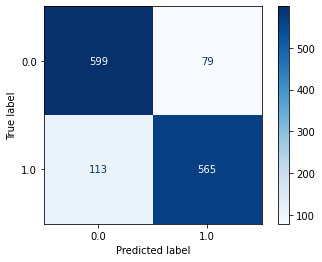

In [201]:
ConfusionMatrixDisplay.from_estimator(regressao_nm, x_teste_nm, y_teste_nm, cmap = 'Blues')
plt.grid(False)
plt.show()

## Comparando os modelos

In [202]:
from sklearn.metrics import recall_score

In [203]:
# Modelos com Smote
metricas_over = pd.DataFrame({
            'Acurácia treino':[arvore_sm.score(x_treino_sm, y_treino_sm), 
                                gboost_sm.score(x_treino_sm, y_treino_sm), 
                                regressao_sm.score(x_treino_sm, y_treino_sm)], 
                              
            'Acurácia teste': [arvore_sm.score(x_teste_sm, y_teste_sm), 
                                gboost_sm.score(x_teste_sm, y_teste_sm), 
                                regressao_sm.score(x_teste_sm, y_teste_sm)], 
                              
            'Recall': [recall_score(y_teste_sm, previsao_arvore_sm),
                       recall_score(y_teste_sm, previsao_gboost_sm),
                       recall_score(y_teste_sm, previsao_regressao_sm)]},

  index = ['Decision Tree Classifier Oversampling', 'Gradient Boosting Oversampling', 'Logistic Regression Oversampling'])

In [204]:
# Modelos com NearMiss
metricas_under = pd.DataFrame({
            'Acurácia treino':[arvore_nm.score(x_treino_nm, y_treino_nm), 
                                gboost_nm.score(x_treino_nm, y_treino_nm), 
                                regressao_nm.score(x_treino_nm, y_treino_nm)], 
                              
            'Acurácia teste': [arvore_nm.score(x_teste_nm, y_teste_nm), 
                                gboost_nm.score(x_teste_nm, y_teste_nm), 
                                regressao_nm.score(x_teste_nm, y_teste_nm)], 
                              
            'Recall': [recall_score(y_teste_nm, previsao_arvore_nm),
                       recall_score(y_teste_nm, previsao_gboost_nm),
                       recall_score(y_teste_nm, previsao_regressao_nm)]},

  index = ['Decision Tree Classifier Undersampling', 'Gradient Boosting Undersampling', 'Logistic Regression Undersampling'])

In [205]:
display(metricas_over,metricas_under)

,Acurácia treino,Acurácia teste,Recall
Decision Tree Classifier Oversampling,1.000000,0.883395,0.899052
Gradient Boosting Oversampling,0.903585,0.897610,0.857437
Logistic Regression Oversampling,0.799890,0.803667,0.785744


,Acurácia treino,Acurácia teste,Recall
Decision Tree Classifier Undersampling,1.000000,0.834071,0.834808
Gradient Boosting Undersampling,0.905066,0.898968,0.862832
Logistic Regression Undersampling,0.836449,0.858407,0.833333


- **Decision Tree Classifier**

  Percebe-se que tanto no oversampling quanto undersampling, o treinamento foi muito bem (até demais). O que pode ter ocasionado um overfiting.


- **Gradient Boosting**

  Neste modelo o treino e o teste tiveram uma acurácia bem coerente. Não apresentando overfiting.


- **Logistic Regression**

  Este apresentou um menor desempenho, em ambos casos, comparado aos demais modelos.


**Conclusão**

O melhor modelo foi o _Gradient Boosting undersampling_.

## Otimizando hiperparâmetros

Com o GridSearchCV serão testados os parâmetros de treinamento para melhorar o modelo Gradient Boosting treinado.

In [206]:
from sklearn.model_selection import GridSearchCV

In [207]:
parameters = {
    "loss":["deviance"],
    "max_depth":[3,5,8],
    "max_features":["log2","sqrt"],
    "criterion": ["friedman_mse",  "absolute_error"],
    "subsample":[0.5, 0.618, 0.8, 0.85, 0.9],
    "n_estimators":[10,100]
    }

In [208]:
grid_search = GridSearchCV(GradientBoostingClassifier(random_state = SEED), parameters,scoring='recall',cv=3,verbose = 1)
grid_search.fit(x_nm, y_nm)

Fitting 3 folds for each of 120 candidates, totalling 360 fits


/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_gb.py:1284: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). Use criterion='friedman_mse' or 'squared_error' instead, as trees should use a squared error criterion in Gradient Boosting.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_gb.py:1284: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). Use criterion='friedman_mse' or 'squared_error' instead, as trees should use a squared error criterion in Gradient Boosting.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_gb.py:1284: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). Use criterion='friedman_mse' or 'squared_error' instead, as trees should use a squared error criterion in Gradient Boosting.
  warnings.warn(
/usr/local/lib/p

GridSearchCV(cv=3, estimator=GradientBoostingClassifier(random_state=144),
             param_grid={'criterion': ['friedman_mse', 'absolute_error'],
                         'loss': ['deviance'], 'max_depth': [3, 5, 8],
                         'max_features': ['log2', 'sqrt'],
                         'n_estimators': [10, 100],
                         'subsample': [0.5, 0.618, 0.8, 0.85, 0.9]},
             scoring='recall', verbose=1)

In [209]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_loss,param_max_depth,param_max_features,param_n_estimators,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.063083,0.015822,0.007403,0.000507,friedman_mse,deviance,3,log2,10,0.5,"{'criterion': 'friedman_mse', 'loss': 'devianc...",0.752212,0.768549,0.818584,0.779782,0.028236,115
1,0.040198,0.000846,0.006334,0.000066,friedman_mse,deviance,3,log2,10,0.618,"{'criterion': 'friedman_mse', 'loss': 'devianc...",0.750000,0.772979,0.810841,0.777940,0.025085,117
2,0.042561,0.002997,0.007155,0.000783,friedman_mse,deviance,3,log2,10,0.8,"{'criterion': 'friedman_mse', 'loss': 'devianc...",0.764381,0.772979,0.807522,0.781627,0.018644,112
3,0.043105,0.001171,0.006632,0.000248,friedman_mse,deviance,3,log2,10,0.85,"{'criterion': 'friedman_mse', 'loss': 'devianc...",0.765487,0.767442,0.807522,0.780150,0.019371,114
4,0.043037,0.002197,0.006593,0.000434,friedman_mse,deviance,3,log2,10,0.9,"{'criterion': 'friedman_mse', 'loss': 'devianc...",0.771018,0.767442,0.799779,0.779413,0.014475,116
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,5.035935,0.093446,0.014321,0.000545,absolute_error,deviance,8,sqrt,100,0.5,"{'criterion': 'absolute_error', 'loss': 'devia...",0.823009,0.838317,0.879425,0.846917,0.023821,27
116,7.030841,0.092167,0.014054,0.000452,absolute_error,deviance,8,sqrt,100,0.618,"{'criterion': 'absolute_error', 'loss': 'devia...",0.825221,0.844961,0.878319,0.849500,0.021913,13
117,10.828320,0.058030,0.015268,0.000718,absolute_error,deviance,8,sqrt,100,0.8,"{'criterion': 'absolute_error', 'loss': 'devia...",0.829646,0.836102,0.878319,0.848022,0.021584,24
118,12.162441,0.063229,0.014217,0.000228,absolute_error,deviance,8,sqrt,100,0.85,"{'criterion': 'absolute_error', 'loss': 'devia...",0.826327,0.840532,0.883850,0.850236,0.024465,12


In [210]:
previsao_grid_search = grid_search.best_estimator_
previsao_grid = previsao_grid_search.predict(x_teste_nm)

In [211]:
grid_search.best_estimator_

GradientBoostingClassifier(max_depth=5, max_features='sqrt', random_state=144,
                           subsample=0.9)

In [212]:
print(classification_report(y_teste_nm, previsao_grid))

              precision    recall  f1-score   support

         0.0       0.90      0.97      0.93       678
         1.0       0.97      0.89      0.93       678

    accuracy                           0.93      1356
   macro avg       0.93      0.93      0.93      1356
weighted avg       0.93      0.93      0.93      1356



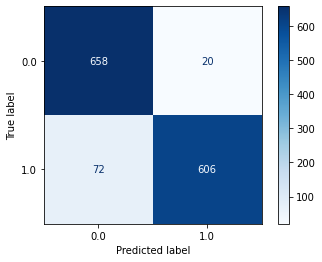

In [213]:
ConfusionMatrixDisplay.from_estimator(previsao_grid_search, x_teste_nm, y_teste_nm, cmap = 'Blues')
plt.grid(False)
plt.show()

## Exportando o modelo

O modelo treinado será exportado para usos futuros ou externos a plataforma.

In [214]:
import pickle

#### Modelo one hot encoder

In [215]:
with open('one_hot_encoder.pkl', 'wb') as file:
    pickle.dump(one_hot_enc, file)

#### Modelo de normalização dos dados

In [216]:
with open('scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)

#### Modelo do gradient boosting do grid search

In [217]:
with open('modelo_treinado.pkl', 'wb') as file:
    pickle.dump(previsao_grid_search, file)